In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df=pd.read_csv('pronostico_dataset.csv',sep=';')
df

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [122]:
df.drop(columns=['ID'], inplace=True)
df.head(5)

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [123]:
df.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


In [124]:
df.isnull().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [125]:
df[df.duplicated()].sum()

age             0.0
systolic_bp     0.0
diastolic_bp    0.0
cholesterol     0.0
prognosis         0
dtype: object

In [126]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
df['prognosis'] = LB.fit_transform(df['prognosis'])
df['prognosis']

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int32

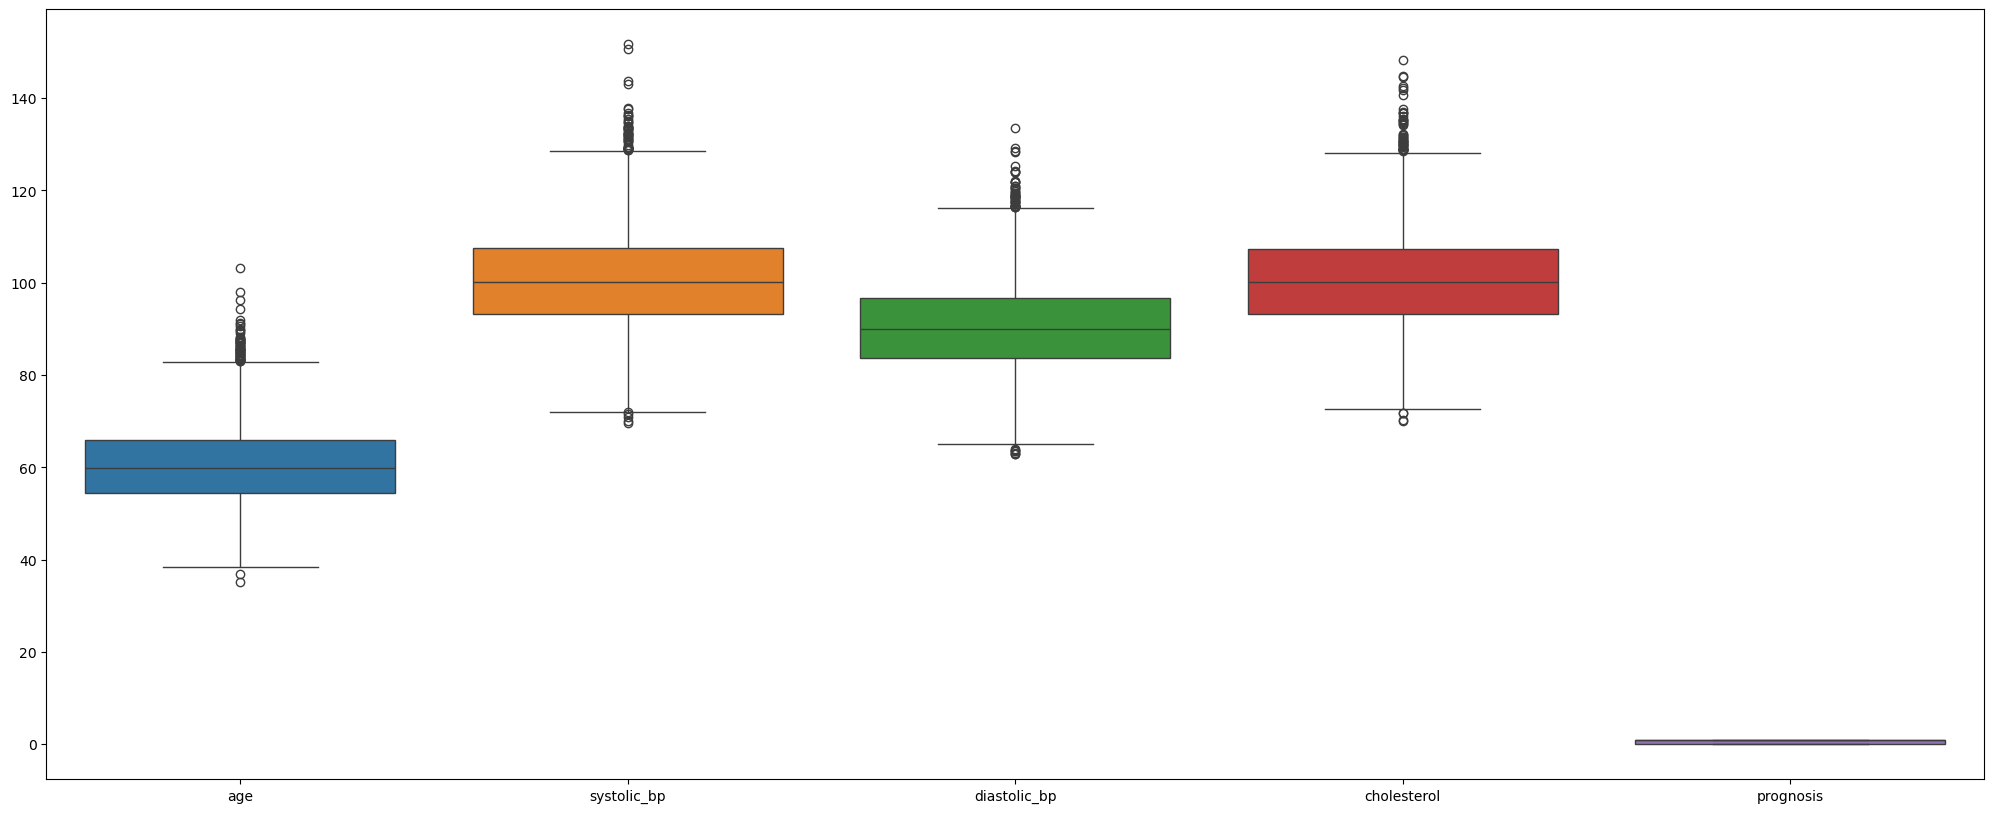

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,10))
sns.boxplot(data=df)
plt.show()

In [128]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['age'] = df['age'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

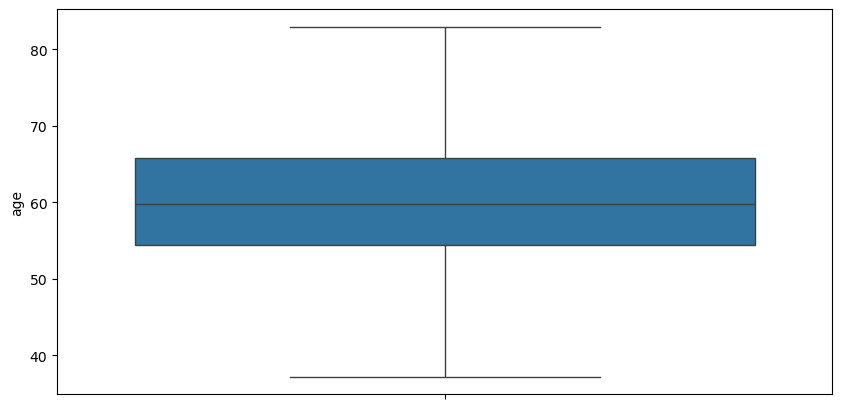

In [129]:
plt.figure(figsize=(10,5))
sns.boxplot(y = df['age'], data=df)
plt.show()

In [130]:
Q1 = df['systolic_bp'].quantile(0.25)
Q3 = df['systolic_bp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['systolic_bp'] = df['systolic_bp'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

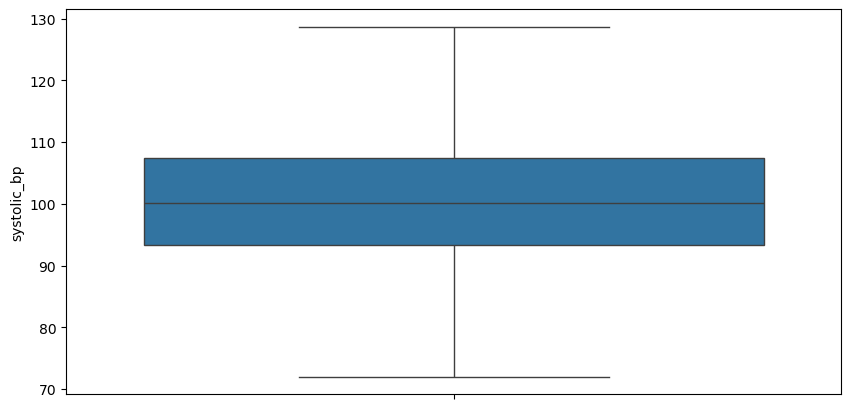

In [131]:
plt.figure(figsize=(10,5))
sns.boxplot(y = df['systolic_bp'], data=df)
plt.show()

In [132]:
Q1 = df['diastolic_bp'].quantile(0.25)
Q3 = df['diastolic_bp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['diastolic_bp'] = df['diastolic_bp'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

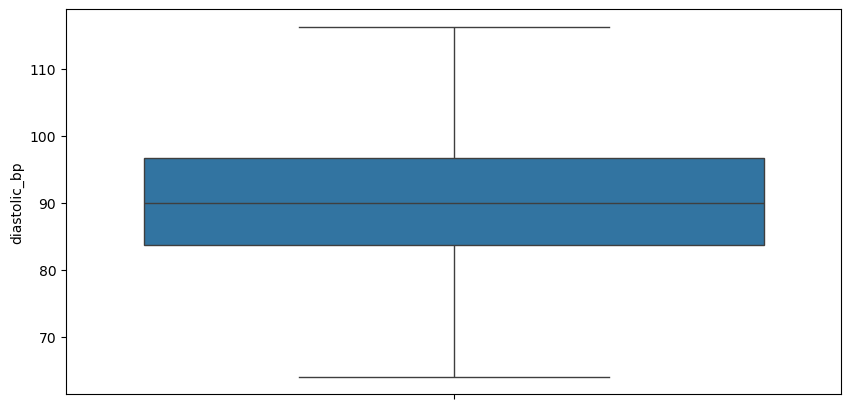

In [133]:
plt.figure(figsize=(10,5))
sns.boxplot(y = df['diastolic_bp'], data=df)
plt.show()

In [134]:
Q1 = df['cholesterol'].quantile(0.25)
Q3 = df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['cholesterol'] = df['cholesterol'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

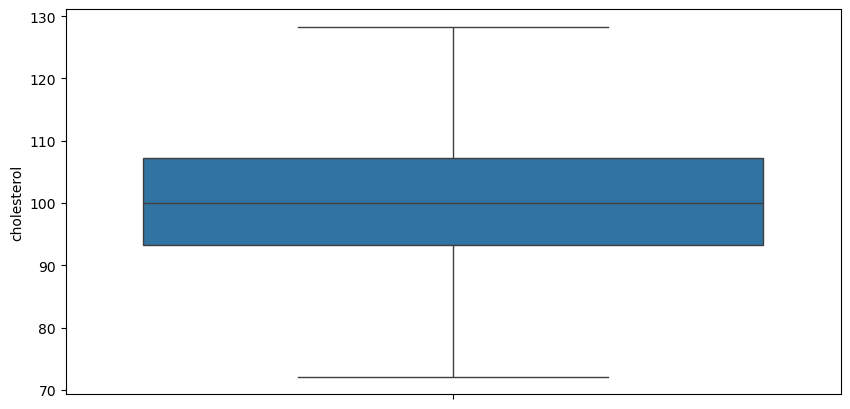

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(y = df['cholesterol'], data=df)
plt.show()

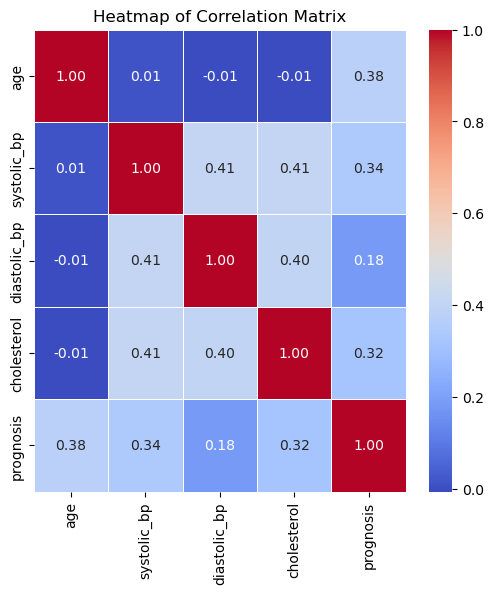

In [136]:
#Checking correlation
# correlation Matrix
corr_matrix  = df.corr()

# plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', linewidths=0.5, fmt= '.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [137]:
features = df.drop(columns=['prognosis'])
target = df['prognosis']
features.head(5)

,age,systolic_bp,diastolic_bp,cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [138]:
target.head(5)

0    1
1    1
2    1
3    1
4    1
Name: prognosis, dtype: int32

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(features), columns= features.columns)
scaled_df.head(10)

,age,systolic_bp,diastolic_bp,cholesterol
0,1.987803,-1.457585,-1.094761,-2.003609
1,0.368091,-0.121084,-0.588848,0.951463
2,1.016869,1.014219,2.029306,0.023510
3,2.632758,-0.531169,-1.131944,-1.313126
4,2.124091,0.806041,0.024980,-0.784232
5,-0.976849,1.937166,2.096075,1.445430
6,0.983466,1.382498,0.236290,0.602059
7,-0.202364,-0.189948,0.387244,0.023647
8,-0.154343,0.192069,0.682538,0.557972
9,0.379330,-0.409297,-1.000780,2.036956


In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state= 100)

In [141]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800, 4)
(1200, 4)
(4800,)
(1200,)


In [142]:
#Using Linear Regression Model

In [143]:
from sklearn.linear_model import LogisticRegression
linear_model = LogisticRegression()
linear_model.fit(x_train, y_train)

LogisticRegression()

In [144]:
prediction =pd.DataFrame( linear_model.predict(x_test), columns=['linear_pred'])
prediction

,linear_pred
0,1
1,0
2,0
3,0
4,1
...,...
1195,0
1196,0
1197,0
1198,1


In [145]:
#Finding performance matrix
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report:")
print(classification_report(y_test, prediction['linear_pred']))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       597
           1       0.76      0.74      0.75       603

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



In [146]:
#Using K Nearest Naighbour Model

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [148]:
prediction['knn_pred'] = knn_model.predict(x_test)
prediction

,linear_pred,knn_pred
0,1,1
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
1195,0,0
1196,0,0
1197,0,1
1198,1,1


In [149]:
#Applying Performance matrix on KNN
print("Classification Report:")
print(classification_report(y_test, prediction['knn_pred']))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       597
           1       0.71      0.74      0.72       603

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200



In [150]:
#Using Random Forest Model

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [152]:
prediction['rf_pred'] = rf_model.predict(x_test)
prediction

,linear_pred,knn_pred,rf_pred
0,1,1,0
1,0,1,0
2,0,0,0
3,0,0,0
4,1,1,1
...,...,...,...
1195,0,0,0
1196,0,0,0
1197,0,1,1
1198,1,1,1


In [153]:
#Applying Perfomance matrix for Random Forest
print("Classification Report:")
print(classification_report(y_test, prediction['rf_pred']))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       597
           1       0.72      0.68      0.70       603

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200



In [154]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', C=1.0)
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [155]:
prediction['svc_pred'] = svc_model.predict(x_test)
prediction

,linear_pred,knn_pred,rf_pred,svc_pred
0,1,1,0,1
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
1195,0,0,0,0
1196,0,0,0,0
1197,0,1,1,0
1198,1,1,1,1


In [156]:
print("Classification Report:")
print(classification_report(y_test, prediction['svc_pred']))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       597
           1       0.76      0.74      0.75       603

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.75      1200
weighted avg       0.76      0.76      0.75      1200



In [157]:
#Using naive bays
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [158]:
nb_text_model = MultinomialNB()
nb_text_model.fit(x_train, y_train)

MultinomialNB()

In [159]:
prediction['nb_pred'] = nb_text_model.predict(x_test)
prediction

,linear_pred,knn_pred,rf_pred,svc_pred,nb_pred
0,1,1,0,1,1
1,0,1,0,0,1
2,0,0,0,0,0
3,0,0,0,0,1
4,1,1,1,1,1
...,...,...,...,...,...
1195,0,0,0,0,0
1196,0,0,0,0,1
1197,0,1,1,0,1
1198,1,1,1,1,1


In [160]:
print("Classification Report:")
print(classification_report(y_test, prediction['nb_pred']))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       597
           1       0.57      0.64      0.60       603

    accuracy                           0.57      1200
   macro avg       0.57      0.57      0.57      1200
weighted avg       0.57      0.57      0.57      1200



In [161]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [162]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [163]:
prediction['dt_model'] = nb_text_model.predict(x_test)
prediction

,linear_pred,knn_pred,rf_pred,svc_pred,nb_pred,dt_model
0,1,1,0,1,1,1
1,0,1,0,0,1,1
2,0,0,0,0,0,0
3,0,0,0,0,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
1195,0,0,0,0,0,0
1196,0,0,0,0,1,1
1197,0,1,1,0,1,1
1198,1,1,1,1,1,1


In [164]:
print("Classification Report:")
print(classification_report(y_test, prediction['dt_model']))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       597
           1       0.57      0.64      0.60       603

    accuracy                           0.57      1200
   macro avg       0.57      0.57      0.57      1200
weighted avg       0.57      0.57      0.57      1200



In [165]:
#Report of 3 models
from sklearn.metrics import accuracy_score
acc_linear = accuracy_score(y_test, prediction['linear_pred'])
acc_knn = accuracy_score(y_test, prediction['knn_pred'])
acc_rf = accuracy_score(y_test, prediction['rf_pred'])
acc_svc = accuracy_score(y_test, prediction['svc_pred'])
acc_nb = accuracy_score(y_test, prediction['nb_pred'])
acc_dt = accuracy_score(y_test, prediction['dt_model'])

In [166]:
report = pd.DataFrame({'Models':['LinearClassifier Model','KNeighborsClassifier Model','RandomForestClassifier','SVM Model','NaiveBayes Model','Decission Tree'],  'accuracy_score':[acc_linear, acc_knn, acc_rf, acc_svc, acc_nb,acc_dt]})
report

,Models,accuracy_score
0,LinearClassifier Model,0.754167
1,KNeighborsClassifier Model,0.717500
2,RandomForestClassifier,0.704167
3,SVM Model,0.755000
4,NaiveBayes Model,0.572500
5,Decission Tree,0.572500


<Axes: xlabel='Models', ylabel='accuracy_score'>

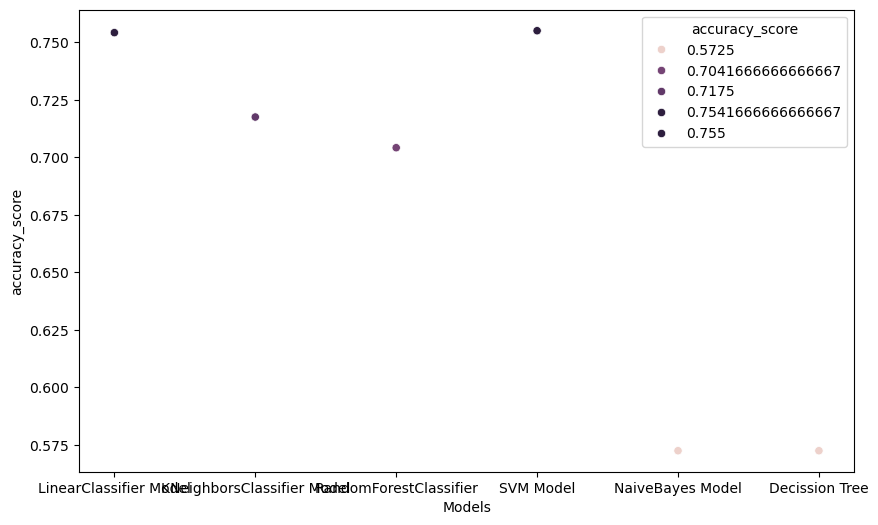

In [167]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=report['Models'], 
                y=report['accuracy_score'], hue = report['accuracy_score'])

In [168]:
import pickle

In [169]:
file='svm.pkl'

In [170]:
pickle.dump(svc_model,open(file,'wb'))

In [171]:
!pip install -q streamlit